q1.a

In [15]:
import pandas as pd

data = {
    'Temp': [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100],
    'Yield': [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0]
}

df = pd.DataFrame(data)
df.to_csv('yield_data.csv', index=False)


q1.b

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def fit_regression(data_file):
    df = pd.read_csv(data_file)
    x = df['Temp'].values
    y = df['Yield'].values
    
    A_linear = np.vstack([x, np.ones(len(x))]).T
    m_linear, c_linear = np.linalg.lstsq(A_linear, y, rcond=None)[0]
    
    A_quad = np.vstack([x**2, x, np.ones(len(x))]).T
    coeff_quad = np.linalg.lstsq(A_quad, y, rcond=None)[0]
    
    print(f"Linear fit: y = {m_linear:.4f}x + {c_linear:.4f}")
    print(f"Quadratic fit: y = {coeff_quad[0]:.4f}x^2 + {coeff_quad[1]:.4f}x + {coeff_quad[2]:.4f}")
    
    return m_linear, c_linear, coeff_quad

fit_regression('yield_data.csv')


Linear fit: y = 0.0068x + 2.3063
Quadratic fit: y = 0.0011x^2 + -0.1537x + 7.9605


(0.006756756756756736,
 2.3063063063063094,
 array([ 1.07560137e-03, -1.53711340e-01,  7.96048110e+00]))

q1.c

In [23]:
def compare_coefficients(data_file):
    m_linear, c_linear, coeff_quad = fit_regression(data_file)
    
    # Manual linear regression calculations
    df = pd.read_csv(data_file)
    x = df['Temp'].values
    y = df['Yield'].values
    
    X_mean = np.mean(x)
    Y_mean = np.mean(y)
    
    # Linear coefficients
    b1 = np.sum((x - X_mean) * (y - Y_mean)) / np.sum((x - X_mean) ** 2)
    b0 = Y_mean - b1 * X_mean
    
    print(f"Manual linear fit: y = {b1:.4f}x + {b0:.4f}")
    print(f"Comparison with programmatic fit: y = {m_linear:.4f}x + {c_linear:.4f}")

compare_coefficients('yield_data.csv')


Linear fit: y = 0.0068x + 2.3063
Quadratic fit: y = 0.0011x^2 + -0.1537x + 7.9605
Manual linear fit: y = 0.0068x + 2.3063
Comparison with programmatic fit: y = 0.0068x + 2.3063


q1.d

Linear fit: y = 0.0068x + 2.3063
Quadratic fit: y = 0.0011x^2 + -0.1537x + 7.9605


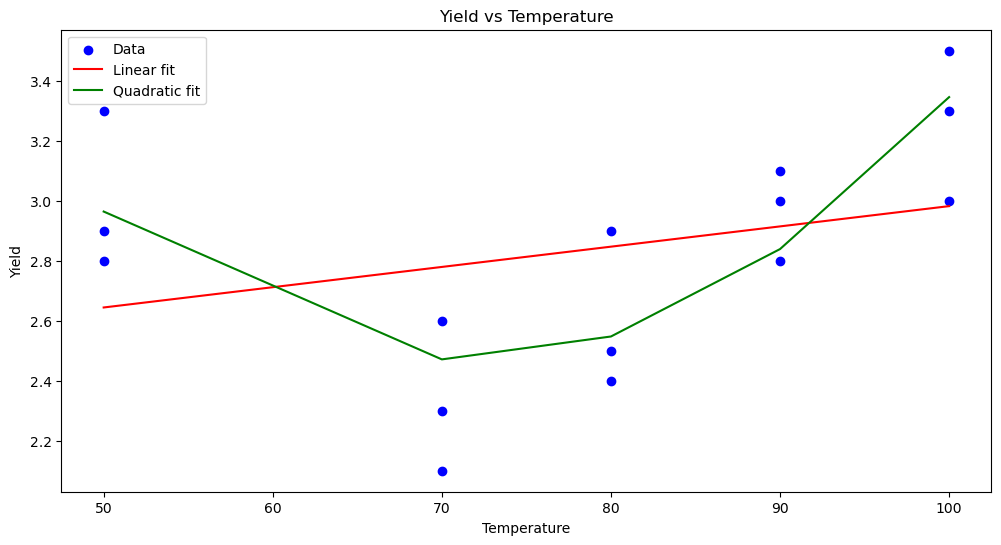

In [27]:
def plot_fits(data_file):
    df = pd.read_csv(data_file)
    x = df['Temp'].values
    y = df['Yield'].values
    
    m_linear, c_linear, coeff_quad = fit_regression(data_file)
    
    y_linear_fit = m_linear * x + c_linear
    
    y_quad_fit = coeff_quad[0] * x**2 + coeff_quad[1] * x + coeff_quad[2]
    plt.figure(figsize=(12, 6))

    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, y_linear_fit, color='red', label='Linear fit')
    plt.plot(x, y_quad_fit, color='green', label='Quadratic fit')
    
    plt.xlabel('Temperature')
    plt.ylabel('Yield')
    plt.title('Yield vs Temperature')
    plt.legend()
    plt.show()

plot_fits('yield_data.csv')


q1.e

In [25]:
def compute_errors(data_file):
    df = pd.read_csv(data_file)
    x = df['Temp'].values
    y = df['Yield'].values
    
    m_linear, c_linear, coeff_quad = fit_regression(data_file)
    
    y_linear_fit = m_linear * x + c_linear
    y_quad_fit = coeff_quad[0] * x**2 + coeff_quad[1] * x + coeff_quad[2]
    
    linear_error = y - y_linear_fit
    quadratic_error = y - y_quad_fit
    
    MSE_linear = np.mean(linear_error ** 2)
    RMSE_linear = np.sqrt(MSE_linear)
    
    MSE_quad = np.mean(quadratic_error ** 2)
    RMSE_quad = np.sqrt(MSE_quad)
    
    print(f"Linear Regression MSE: {MSE_linear:.4f}")
    print(f"Linear Regression RMSE: {RMSE_linear:.4f}")
    print(f"Quadratic Regression MSE: {MSE_quad:.4f}")
    print(f"Quadratic Regression RMSE: {RMSE_quad:.4f}")

compute_errors('yield_data.csv')


Linear fit: y = 0.0068x + 2.3063
Quadratic fit: y = 0.0011x^2 + -0.1537x + 7.9605
Linear Regression MSE: 0.1327
Linear Regression RMSE: 0.3643
Quadratic Regression MSE: 0.0478
Quadratic Regression RMSE: 0.2186


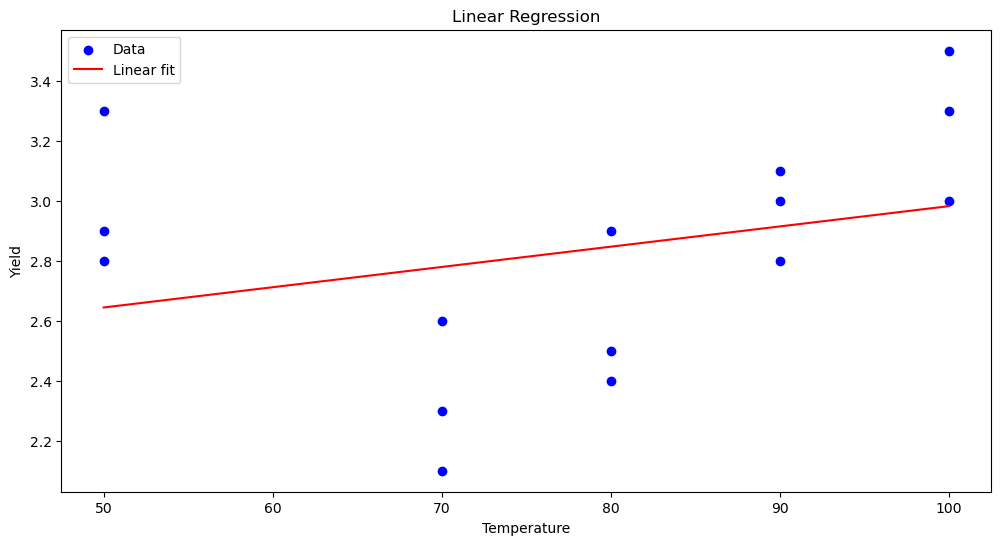

Linear Regression coefficients: 0.01
Linear Regression intercept: 2.31


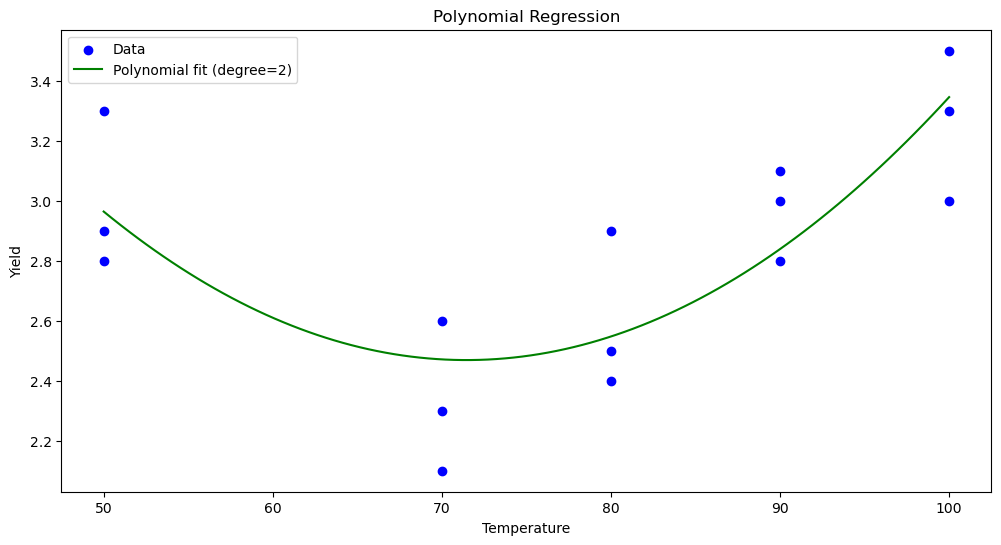

Polynomial Regression coefficients: [ 0.         -0.15371134  0.0010756 ]
Polynomial Regression intercept: 7.96


In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Load the data from CSV file
df = pd.read_csv('/home/student/220962076_ML_LAB/Week4/yield_data.csv')
x = df['Temp'].values.reshape(-1, 1)  # Reshape for a single feature
y = df['Yield'].values



# Create and fit the linear model
linear_model = LinearRegression()
linear_model.fit(x, y)

# Predict using the linear model
x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_linear_pred = linear_model.predict(x_range)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_range, y_linear_pred, color='red', label='Linear fit')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Output the coefficients
print(f"Linear Regression coefficients: {linear_model.coef_[0]:.2f}")
print(f"Linear Regression intercept: {linear_model.intercept_:.2f}")

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

X_poly_range = poly.transform(x_range)
y_poly_pred = poly_model.predict(X_poly_range)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_range, y_poly_pred, color='green', label='Polynomial fit (degree=2)')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

print(f"Polynomial Regression coefficients: {poly_model.coef_}")
print(f"Polynomial Regression intercept: {poly_model.intercept_:.2f}")



q2.b

In [33]:
import numpy as np
import pandas as pd

def multiple_linear_regression(csv_file):
    df = pd.read_csv(csv_file)
    y = df['Infarc'].values
    X = df[['Area','X2', 'X3']].values
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept column

    X_transpose = X.T
    coeffs = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

    return coeffs

coefficients = multiple_linear_regression('q2.csv')
print("Fitted coefficients:", coefficients)


Fitted coefficients: [-0.10798941  0.56328507 -0.22065929 -0.03825482]


In [ ]:
q2.e

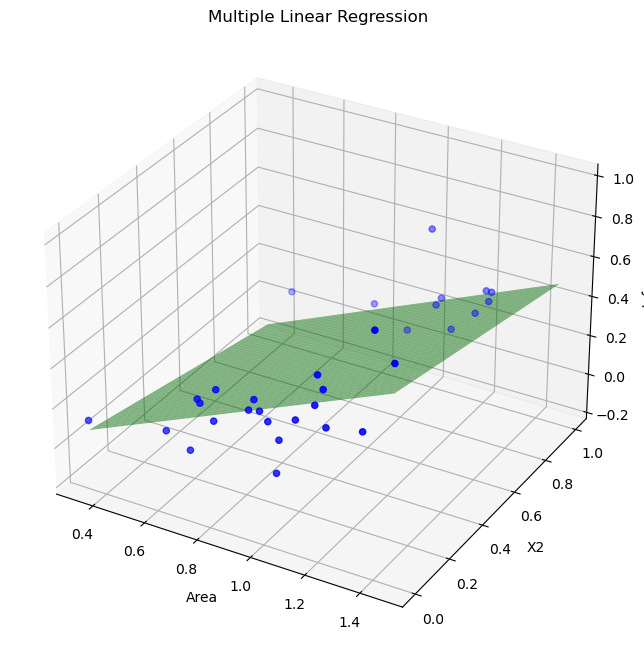

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_regression(csv_file, coefficients):
    df = pd.read_csv(csv_file)
    X = df[['Area', 'X2', 'X3']].values
    y = df['Infarc'].values

    area_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    X2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    Area_mesh, X2_mesh = np.meshgrid(area_range, X2_range)
    
    fixed_X3 = np.mean(X[:, 2])  
    
    X_mesh = np.vstack((np.ones_like(Area_mesh.flatten()), Area_mesh.flatten(), X2_mesh.flatten(), np.full_like(Area_mesh.flatten(), fixed_X3))).T
    y_pred = X_mesh @ coefficients
    
    y_pred_mesh = y_pred.reshape(Area_mesh.shape)

    # Plotting
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df['Area'], df['X2'], y, color='blue', label='Data')

    surface = ax.plot_surface(Area_mesh, X2_mesh, y_pred_mesh, color='green', alpha=0.5)

    ax.set_xlabel('Area')
    ax.set_ylabel('X2')
    ax.set_zlabel('Infarc')
    ax.set_title('Multiple Linear Regression')

    plt.show()

coefficients = np.array([-0.10798941 , 0.56328507, -0.22065929 ,-0.03825482])  # Replace with your actual coefficients
plot_regression('q2.csv', coefficients)


In [37]:
import numpy as np
import pandas as pd

def compute_errors(csv_file, coefficients):
    df = pd.read_csv(csv_file)
    y = df['Infarc'].values
    X = df[['Area', 'X2', 'X3']].values

    X = np.hstack((np.ones((X.shape[0], 1)), X))

    y_pred = X @ coefficients

    residuals = y - y_pred

    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)

    return mse, rmse

csv_file = 'q2.csv'
coefficients = np.array([-0.10798941 , 0.56328507, -0.22065929 ,-0.03825482])  # Replace with your actual coefficients
mse, rmse = compute_errors(csv_file, coefficients)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.018235423328511878
Root Mean Squared Error (RMSE): 0.1350385994022149


In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def perform_regression_sklearn(csv_file):
    # Load the data
    df = pd.read_csv(csv_file)
    y = df['Infarc'].values
    X = df[['Area','X2', 'X3']].values

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    print("Intercept:", model.intercept_)
    print("Coefficients:", model.coef_)

    return model, X, y, y_pred

model, X, y, y_pred = perform_regression_sklearn('q2.csv')


Intercept: -0.10798941009855767
Coefficients: [ 0.56328507 -0.22065929 -0.03825482]
